In [3]:
print("Task 1 - This is fun")
import pandas
from datetime import datetime
import numpy as np
maintenenceDataDest = "C:\\Users\\David\\Desktop\\DevOps2019\\systecon2020\\backend\\Back-End Task Data\\MaintenanceData\\maintenance_data.csv"
headers=['Item','System','Failure observation','Repair time']
dtypes = {'Item':'str','System':'str','Failure observation':'str','Repair time':'str'}
#dtypes = [str, str, datetime, float]


dateColumn = ['Failure observation']
df = pandas.read_csv(maintenenceDataDest, header=None, names=headers, dtype=dtypes)
df = df.iloc[1:]
#pandas.to_numeric(df['Repair time'], errors='coerce')
df['Repair time'] = df['Repair time'].astype(float)

print (df.head)
###Convert the Date Column into dates under a copy of the dataframe
df2= df.copy()
df2['Failure observation'] = [datetime.strptime(date, '%m/%d/%Y').date() for date in df2['Failure observation']]
print("Coverting to datetime... " )
print (df2.head)


Task 1 - This is fun
<bound method NDFrame.head of               Item     System Failure observation  Repair time
1      Component 1  System 01           3/19/1990        23.44
2      Component 1  System 01           8/16/1990        23.29
3      Component 1  System 01           9/24/1990        20.98
4      Component 1  System 01           12/6/1990        21.01
5      Component 1  System 01           1/20/1991        29.92
...            ...        ...                 ...          ...
6249  Component 10  System 08           6/29/2012        13.00
6250  Component 10  System 08            3/1/2015         5.49
6251  Component 10  System 08            3/2/2015         6.63
6252  Component 10  System 08            6/9/2015        11.14
6253  Component 10  System 08            7/1/2015         9.63

[6253 rows x 4 columns]>
Coverting to datetime... 
<bound method NDFrame.head of               Item     System Failure observation  Repair time
1      Component 1  System 01          1990-03-1

In [4]:



###I - Provide some high level metrics such as...
##1 - number of observations
df.count
print(df.count)
##2a - minimum, maximum, and mean values
#a - Earliest Failure Observation - '1/1/1990'"
earliestObs = df['Failure observation'].min()
print("#a - Earliest Failure Observation - "+ earliestObs)
#b.1 - shortest repair time - 5.01"
print ('b - Shortest Repair time - '+str(df['Repair time'].min()))
print(df['Repair time'].min())
#b.2 - longest repair time - 230.0"

print("#b.2 - longest repair time - "+ str(df['Repair time'].max()))
#Mean
print("#b.3 - average repair time - "+ str(df['Repair time'].mean()))

#First Repair
print("#c - First repair - '")
print(df2['Failure observation'].min())
#Last Repair
print("#c - Latest repair - '")
print(df2['Failure observation'].max())
#d - Longest repair time - 230.0
df['Repair time'].max()



print("#Min, Max, and Average Repair Time per System")
df3System = df[['Item', 'System', 'Repair time']]
print("MINIMUM REPAIR PER SYSTEM")
print(df3System.groupby(['System', 'Item']).min())
print("MAXIMUM REPAIR PER SYSTEM")
print(df3System.groupby(['System', 'Item']).max())
print("AVERAGE REPAIR PER SYSTEM")
print(df3System.groupby(['System', 'Item']).mean())

df3Item = df[['System','Item', 'Repair time']]
print("MINIMUM REPAIR PER COMPONENT")
print(df3Item.groupby(['Item', 'System']).min())
print("MAXIMUM REPAIR PER COMPONENT")
print(df3Item.groupby(['Item', 'System']).max())
print("AVERAGE REPAIR PER COMPONENT")
print(df3Item.groupby(['Item', 'System']).mean())



print("#e - other stuff")
print(df.Item.unique())
print(df['System'].unique())



<bound method DataFrame.count of               Item     System Failure observation  Repair time
1      Component 1  System 01           3/19/1990        23.44
2      Component 1  System 01           8/16/1990        23.29
3      Component 1  System 01           9/24/1990        20.98
4      Component 1  System 01           12/6/1990        21.01
5      Component 1  System 01           1/20/1991        29.92
...            ...        ...                 ...          ...
6249  Component 10  System 08           6/29/2012        13.00
6250  Component 10  System 08            3/1/2015         5.49
6251  Component 10  System 08            3/2/2015         6.63
6252  Component 10  System 08            6/9/2015        11.14
6253  Component 10  System 08            7/1/2015         9.63

[6253 rows x 4 columns]>
#a - Earliest Failure Observation - 1/1/1990
b - Shortest Repair time - 5.01
5.01
#b.2 - longest repair time - 230.0
#b.3 - average repair time - 75.38645610107169
#c - First repair - '

In [9]:
##4 Generate Interarrival times##
print("#Generate Interarrival times for all systems")

#need to sort the calender first
#dateData = df2['Failure observation']

#need to sort the calender first
#dateData = df2['Failure observation']
#print(df2['Failure observation'].sort_values())
print("## THE FAILURE INTERVAL IS : ")
print(df2['Failure observation'].sort_values().diff())
print("## AVERAGE FAILURE INTERVAL IS : ")
print(df2['Failure observation'].sort_values().diff().mean())


print("##Generate Interarrival times for each system and item combination")
df4=df2[['System', 'Item', 'Failure observation']]
print(df4.head())
print(df4.groupby('System'))

print('Analysis: "Component 10 and 2 appear to be the lesser bottlenecks per system. Component 4 and 9 appear to be the primary bottlenecks per system. Each system itself falls within the same average parameters. With one system breaking everyday, and with it taking approximately three days to repair a system, investigation as to how to potentially '
      'phase out Component 10 and 2 should prove worthwhile."')

#dfSyst1 = df2.loc['System 01']



#Generate Interarrival times for all systems
## THE FAILURE INTERVAL IS : 
4496      NaT
3460   1 days
3966   1 days
4594   1 days
3967   0 days
        ...  
3965   1 days
5765   2 days
1684   0 days
532    2 days
4193   1 days
Name: Failure observation, Length: 6253, dtype: timedelta64[ns]
## AVERAGE FAILURE INTERVAL IS : 
1 days 12:26:29.251439
##Generate Interarrival times for each system and item combination
      System         Item Failure observation
1  System 01  Component 1          1990-03-19
2  System 01  Component 1          1990-08-16
3  System 01  Component 1          1990-09-24
4  System 01  Component 1          1990-12-06
5  System 01  Component 1          1991-01-20
Analysis: "Component 10 and 2 appear to be the lesser bottlenecks per system. Component 4 and 9 appear to be the primary bottlenecks per system. Each system itself falls within the same average parameters. With one system breaking everyday, and with it taking approximately three days to repair a system, in

=======Item Failure Timeline=====
             Item Failure observation  Repair time
4496  Component 8          1990-01-01        93.77
3460  Component 6          1990-01-02        52.06
3966  Component 6          1990-01-03        50.24
4594  Component 9          1990-01-04       182.96
3967  Component 6          1990-01-04        57.35
...           ...                 ...          ...
3965  Component 6          2015-12-24        50.47
5765  Component 9          2015-12-26       181.97
1684  Component 2          2015-12-26        15.25
532   Component 1          2015-12-28        21.91
4193  Component 6          2015-12-29        57.58

[6253 rows x 3 columns]


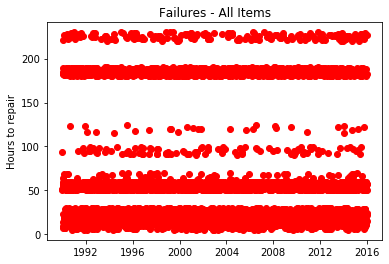

             Item Failure observation  Repair time
279   Component 1          1990-01-19        23.51
280   Component 1          1990-02-14        22.18
1     Component 1          1990-03-19        23.44
682   Component 1          1990-03-29        28.96
683   Component 1          1990-04-10        21.11
...           ...                 ...          ...
530   Component 1          2015-11-16        25.86
1052  Component 1          2015-11-17        23.25
531   Component 1          2015-11-17        29.04
681   Component 1          2015-12-23        24.20
532   Component 1          2015-12-28        21.91

[1052 rows x 3 columns]
             Item Failure observation  Repair time
2389  Component 4          1990-01-30       221.24
2321  Component 4          1990-03-01       227.37
2390  Component 4          1990-04-24       223.72
2365  Component 4          1990-05-11       227.54
2366  Component 4          1990-06-29       222.74
...           ...                 ...          ...
2476  

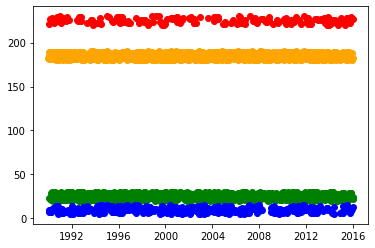

=======System Failure Timeline=====
         System Failure observation  Repair time
4496  System 01          1990-01-01        93.77
3460  System 05          1990-01-02        52.06
3966  System 07          1990-01-03        50.24
4594  System 01          1990-01-04       182.96
3967  System 07          1990-01-04        57.35
...         ...                 ...          ...
3965  System 06          2015-12-24        50.47
5765  System 07          2015-12-26       181.97
1684  System 06          2015-12-26        15.25
532   System 04          2015-12-28        21.91
4193  System 07          2015-12-29        57.58

[6253 rows x 3 columns]


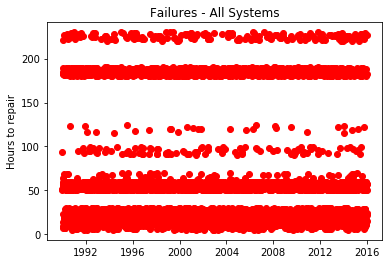

In [15]:
#5 Create a histogram
import matplotlib.pyplot as plt


##Do Components Grow Easier to Repair over time? Initial observations show little change?
itemFailTimeline = df2[['Item', 'Failure observation', 'Repair time']].sort_values(by='Failure observation', ascending=True)

print("=======Item Failure Timeline=====")
print(itemFailTimeline)
fig = plt.plot_date(itemFailTimeline['Failure observation'], itemFailTimeline['Repair time'], color='red')
plt.ylabel("Hours to repair")
plt.title("Failures - All Items")
plt.show()

#Let's combine just a few main item failures
item1FailTimeline = itemFailTimeline.query('Item =="Component 1"')
print(item1FailTimeline)
fig = plt.plot_date(item1FailTimeline['Failure observation'], item1FailTimeline['Repair time'], color='green')


item4FailTimeline = itemFailTimeline.query('Item =="Component 4"')
print(item4FailTimeline)
fig = plt.plot_date(item4FailTimeline['Failure observation'], item4FailTimeline['Repair time'], color='red')


item9FailTimeline = itemFailTimeline.query('Item =="Component 9"')
print(item9FailTimeline)
fig = plt.plot_date(item9FailTimeline['Failure observation'], item9FailTimeline['Repair time'], color='orange')

item10FailTimeline = itemFailTimeline.query('Item =="Component 10"')
fig =plt.plot_date(item10FailTimeline['Failure observation'], item10FailTimeline['Repair time'], color='blue')

print(item10FailTimeline)
plt.show()
#print(df4.groupby('System'))


###What about Systems?
systemFailTimeline = df2[['System', 'Failure observation', 'Repair time']].sort_values(by='Failure observation', ascending=True)

print("=======System Failure Timeline=====")
print(systemFailTimeline)
fig = plt.plot_date(systemFailTimeline['Failure observation'], systemFailTimeline['Repair time'], color='red')
plt.ylabel("Hours to repair")
plt.title("Failures - All Systems")
plt.show()


===FULL DATASET===
LinregressResult(slope=0.0006242690708845187, intercept=73.96683488894651, rvalue=0.01220696574708385, pvalue=0.3344847432383041, stderr=0.0006467805981319653)
===ITEM 1 DATASET===
LinregressResult(slope=5.869355901234268e-05, intercept=25.02871552730882, rvalue=0.005640493925873128, pvalue=0.8550092209789971, stderr=0.0003211232500497375)
===ITEM 4 DATASET===
LinregressResult(slope=-0.005646476262119146, intercept=225.6822816148259, rvalue=-0.10258934825303384, pvalue=0.17055888803340735, stderr=0.004103625700647194)
===ITEM 9 DATASET===
LinregressResult(slope=-0.0002784795988692653, intercept=185.1660638774846, rvalue=-0.03386099804901162, pvalue=0.21961575782927795, stderr=0.00022674975715394983)
===ITEM 10 DATASET===
LinregressResult(slope=6.0040821775609964e-05, intercept=9.91146712307194, rvalue=0.0020969381834016892, pvalue=0.9690889987403958, stderr=0.0015482710454469677)


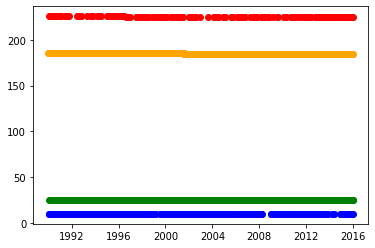

In [28]:
#Let's do some linear regression over the entire data set? Can we learn anything about these variances?
from scipy import stats
#==LINEAR REGRESSION FORMULA==
def fitLine(x, y):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)
    return slope * x + intercept


#We'll need some fitlines first.
allX =itemFailTimeline['Failure observation'].factorize()[0]
allY = itemFailTimeline['Repair time'].values


print("===FULL DATASET===")
print(stats.linregress(allX,allY))

print("===ITEM 1 DATASET===")
item1X = item1FailTimeline['Failure observation'].factorize()[0]
item1Y =  item1FailTimeline['Repair time'].values
item1Fit= fitLine(item1X, item1Y)

plt.plot_date(item1FailTimeline['Failure observation'], item1Fit, c='g')
print(stats.linregress(item1X,item1Y))

print("===ITEM 4 DATASET===")
item4X = item4FailTimeline['Failure observation'].factorize()[0]
item4Y =  item4FailTimeline['Repair time'].values
item4Fit= fitLine(item4X, item4Y)
plt.plot_date(item4FailTimeline['Failure observation'], item4Fit, c='r')
print(stats.linregress(item4X,item4Y))


print("===ITEM 9 DATASET===")
item9X = item9FailTimeline['Failure observation'].factorize()[0]
item9Y =  item9FailTimeline['Repair time'].values
item9Fit= fitLine(item9X, item9Y)
plt.plot_date(item9FailTimeline['Failure observation'], item9Fit, c='orange')
print(stats.linregress(item9X,item9Y))

print("===ITEM 10 DATASET===")
item10X = item10FailTimeline['Failure observation'].factorize()[0]
item10Y =  item10FailTimeline['Repair time'].values
item10Fit= fitLine(item10X, item10Y)
plt.plot_date(item10FailTimeline['Failure observation'], item10Fit, c='b')
print(stats.linregress(item10X,item10Y))




plt.show()